# ECE 435/535 Computational HW3

### Name: Amir Reza Vazifeh

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

## 1) Expectation  Maximization for a Scalar GMM
Objective: Fit a three component scalar GMM to training data.

In [89]:
"""
These functions are provided to you.
"""
def generateScalarGMM(p, mu, sig, nx, nc):
    # seed
    rnd.seed(220606)

    # samples
    sx = np.zeros(nx)
    sy = np.zeros(nx, dtype=int)
    for j in range(0,nx):
        sample = np.random.multinomial(1, p)
        i = (np.argwhere(sample==1).ravel())[0]   # Small modification is applied to this line (adding [0])
        sx[j] = rnd.gauss(mu[i],sig[i])
        sy[j] = i
    return sx, sy

def generate2DGMM(p, mu, sig, nx, nc):
    # seed
    rnd.seed(220606)

    nf = mu.shape[1]
    # samples
    sx = np.zeros((nx, nf))
    sy = np.zeros(nx, dtype=int)
    for j in range(0,nx):
        sample = np.random.multinomial(1, p)
        i = np.argwhere(sample==1).ravel()
        sx[j] = np.random.normal(mu[i],sig[i])
        sy[j] = i
    return sx, sy

def gaussfunc(mu,sig,x):
   return (1/np.sqrt(2*np.pi)) * (1/sig) * np.exp(-(1.0/(2*sig**2))*(x-mu)**2)

def bgaussfunc(mu,sigma,x,y):
   return (1/(2*np.pi)) * (1/(sigma[0]*sigma[1])) * np.exp(-(1.0/2)*(((x-mu[0])/sigma[0])**2 +((y-mu[1])/sigma[1])**2))

**1-a) Compute the marginal density $f_{X}(x)$ of a scalar GMM given its parameters**   
Given the parameters of a GMM, write a function to compute the marginal density $f_{X}(x)$ for a given set of values of $x$.
This is in preparation to plot the density.

In [90]:
def generateDistribution(x, p , mu, sigma , nc=3):
    """
    TODO: Given the mixture parameters, find the density at a set of points x
    Inputs:
    x: Set of points
    p: Weights of the mixture
    mu: Means of the mixture
    sigma: Standard deviations of the mixture

    Outputs:
    f: Probabilitiy density at each point in x

    Hint: Use the gaussfunc provided to you
    """

    # Initialize an array for marginal density values (f_X(x))
    f = np.zeros(len(x), dtype=float)

    # Loop through each data point in x
    for i in range(len(x)):

        density = 0     # Initialize marginal density at current point

        for j in range(nc):
            # Add the weighted PDF of the j-th Gaussian component to the density
            density += p[j] * gaussfunc(mu[j], sigma[j], x[i])

        # Store the computed density in the result array f
        f[i] = density

    return f

**1-b Plot a scalar GMM marginal density**  
For the parameter values:  
p = [0.25, 0.5, 0.25]  
mu = [-2.5, -1.0, 2.0]  
sigma = [0.25, 0.25, 0.5]  
Plot the GMM marginal density $f_X (x)$ at 200 equally spaced points in [-5, 5].

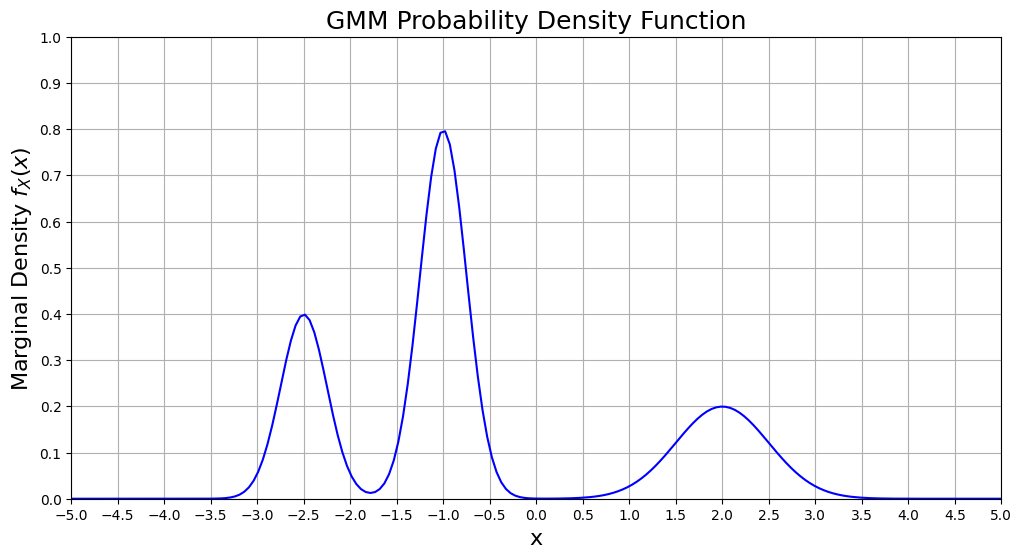

In [91]:
# Generate 200 equally spaced points in the interval [-5, 5]
x = np.linspace(-5, 5, 200)

p = [0.25, 0.5, 0.25]         # Weights of the mixture components
mu = [-2.5, -1.0, 2.0]        # Means of the gaussian mixture components
sigma = [0.25, 0.25, 0.5]     # Standard deviations of the gaussian mixture components

# Compute marginal density at the given points
f_x = generateDistribution(x, p, mu, sigma, nc=len(p))

# Set the figure size width and height
plt.figure(figsize = (12,6))

# Plotting
plt.plot(x, f_x, color='blue')

# Set the x-ticks from -5 to 5 with a step of 0.5
plt.xticks(np.arange(-5, 5.5, 0.5))

# Set the x-axis limits to -5 and 5
plt.xlim(-5, 5)

# Set the x-ticks from 0 to 1 with a step of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# Set the y-axis limits to 0 and 1
plt.ylim(0, 1)

# Add labels
plt.xlabel('x', fontsize=16)
plt.ylabel('Marginal Density $f_X(x)$', fontsize=16)
plt.title('GMM Probability Density Function', fontsize=18)
plt.grid()

# Display the plot
plt.show()

**1-c) Complete Maximum Likelihood**  
As a warm-up exercise, assume that the latent labels are known for each datapoint. Complete the function provided below to estimate the parameters of the GMM using maximum likelihood. (Write the function without using scikit-learn)

In [92]:
def fitGMMcomplete(sx, sy, nc):
    """
    TODO: Assuming that the latent labels are provided to you,
    use maximum likelihood to estimate the mean and variance of the nc Gaussians.
    Inputs:
    sx - Scalar datapoints
    sy - Labels
    nc - Number of clusters

    Outputs:
    p_ml - Weights of the mixture
    mu_ml - Means of the mixture
    sig_ml - Standard deviations of the mixture
    """

    # Initialize Weights, Means, Standard deviations
    p_ml = np.zeros(nc)
    mu_ml = np.zeros(nc)
    sig_ml = np.zeros(nc)

    # Iterate over each cluster and calculate mean, sd, and weights
    for i in range(nc):

        # Select data points belonging to the current cluster
        data_with_label_i = sx[sy == i]

        # Calculate the weight of the cluster
        p_ml[i] = len(data_with_label_i) / len(sx)

        # Calculate the mean of the cluster
        mu_ml[i] = np.mean(data_with_label_i)

        # Calculate the sd of the cluster
        sig_ml[i] = np.std(data_with_label_i)

    return p_ml, mu_ml, sig_ml

**1-d) Generate training data**  
Generate nx = 100 training examples $\{(x_j,y_j)\}_{j=1}^{100}$ from a scalar GMM with the parameters in 1-b)   

In [93]:
nx = 300  # Number of training examples
nc = 3    # Number of gaussian mixture components
p = [0.25, 0.5, 0.25]         # Weights of the mixture components
mu = [-2.5, -1.0, 2.0]        # Means of the gaussian mixture components
sigma = [0.25, 0.25, 0.5]     # Standard deviations of the gaussian mixture components

sx, sy = generateScalarGMM(p, mu, sigma, nx, nc)

**1-e) Use the training data to find the complete maximum likelihood parameter estimates of the GMM**  
Use your code to find the complete maximum likelihood estimates from the training data. Print the estimates of $p$, $\mu$, and $\sigma$ (3-vectors).

In [94]:
"""
This code is provided to you.
"""
p_ml, mu_ml, sigma_ml = fitGMMcomplete(sx, sy, nc)
print('CML estimate of p:',p_ml)
print('CML estimate of mu:',mu_ml)
print('CML estimate of sigma:',sigma_ml)

CML estimate of p: [0.24333333 0.49333333 0.26333333]
CML estimate of mu: [-2.5208488  -0.99552925  1.98819236]
CML estimate of sigma: [0.23679902 0.24157331 0.48646271]


**1-f) Plot the training data, true marginal density, and estimated marginal density**  
On one figure: plot the training data as points on the x-axis, the true marginal density $f_X(x)$, and the estimated marginal density $\hat f_X(x)$. Use a legend and label all axes.

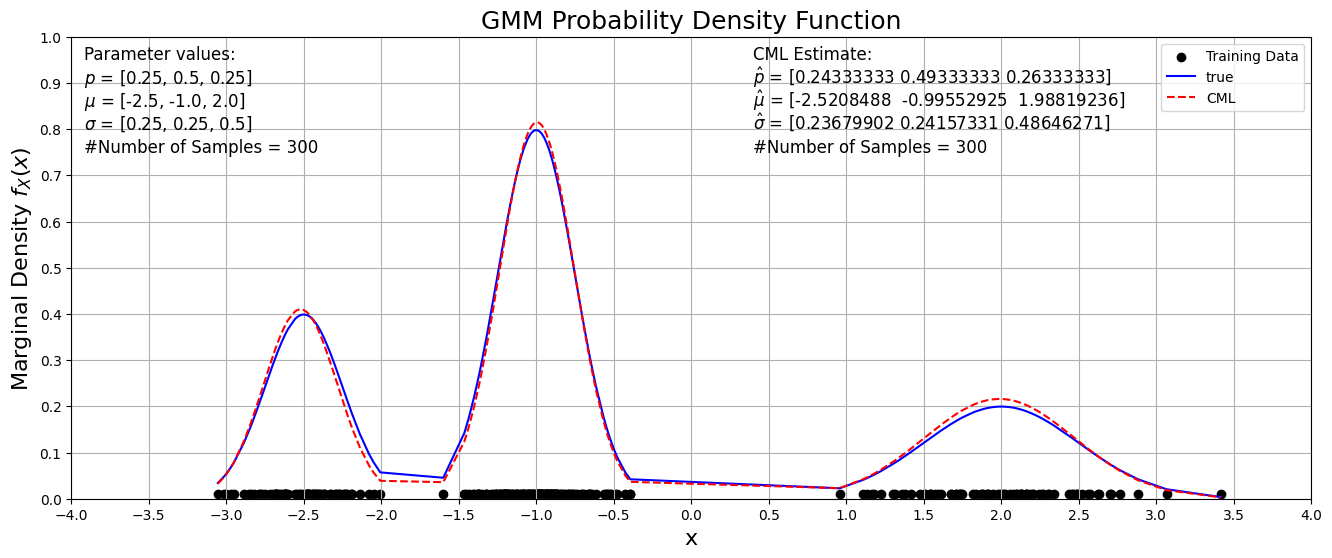

In [95]:
#Plot the points, the true distribution and maximum likelihood estimate of the distribution.
#Clearly label the axes and the plots with legend.

# Set the figure size width and height
plt.figure(figsize = (16,6))

# Create a scatter plot for the training data points
plt.scatter(sx, np.zeros_like(sx)+0.01, label='Training Data', marker='o', color='black')

# Compute marginal density at the given points
sx_sorted = np.sort(sx)
f_x = generateDistribution(sx_sorted, p, mu, sigma, nc=len(p))
f_hat_x = generateDistribution(sx_sorted, p_ml, mu_ml, sigma_ml, nc=len(p))

# Plotting
plt.plot(sx_sorted, f_x, label='true', color='blue')
plt.plot(sx_sorted, f_hat_x, linestyle='--', label='CML', color='red')

plt.text(0.01, 0.95, 'Parameter values:', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.01, 0.9, f'$p$ = {p}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.01, 0.85, f'$\mu$ = {mu}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.01, 0.8, f'$\sigma$ = {sigma}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.01, 0.75, f'#Number of Samples = {nx}', transform=plt.gca().transAxes, fontsize=12, color='black')


plt.text(0.55, 0.95, 'CML Estimate:', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.9, f'$\hat p$ = {p_ml}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.85, f'$\hat\mu$ = {mu_ml}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.8, f'$\hat\sigma$ = {sigma_ml}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.75, f'#Number of Samples = {nx}', transform=plt.gca().transAxes, fontsize=12, color='black')


# Set the x-ticks from -5 to 5 with a step of 0.5
plt.xticks(np.arange(-5, 5.5, 0.5))

# Set the x-axis limits to -4 and 4
plt.xlim(-4, 4)

# Set the x-ticks from 0 to 1 with a step of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# Set the y-axis limits to 0 and 1
plt.ylim(0, 1)

# Add labels
plt.xlabel('x', fontsize=16)
plt.ylabel('Marginal Density $f_X(x)$', fontsize=16)
plt.title('GMM Probability Density Function', fontsize=18)
plt.grid()

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

**1-g) EM Algorithm**  
Now, we are going to code the EM algorithm assuming that the latent variables sy are unknown. We are going to first run k-means and use the results to initialize the EM algorithm. We will use the k-means algorithm in scikit-learn.

In [96]:
"""
This code is provided to you.
"""

from sklearn.cluster import KMeans

sxm = sx[:, np.newaxis]
print(sxm.shape)
kmeans = KMeans(n_clusters=3, random_state=0).fit(sxm)
print('k-means labels\n', kmeans.labels_)
print('k-means cluster centers: ', np.squeeze(kmeans.cluster_centers_))

(300, 1)
k-means labels
 [1 2 1 2 1 0 0 2 1 0 1 0 0 0 0 1 0 1 2 1 1 1 1 2 2 1 2 0 1 1 1 1 1 2 0 1 2
 1 2 2 2 2 1 2 2 0 2 1 1 0 0 2 2 1 1 2 1 0 2 1 2 2 1 1 1 0 1 2 1 1 1 1 2 0
 0 1 0 0 0 0 0 2 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 2 0 1 2 2 1 1 1 1 1 1 1 0 0
 1 2 1 1 2 2 1 1 1 2 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 2 1 1 0 0 1 0 1 0 2 1 1
 1 0 1 2 1 1 0 1 0 2 2 2 1 2 1 1 2 1 0 1 0 1 1 0 0 1 1 1 2 0 1 1 2 1 1 1 1
 0 2 1 1 2 1 0 0 0 1 1 1 1 1 2 0 1 1 0 0 0 0 2 1 2 0 1 1 2 0 1 2 1 1 2 2 2
 2 2 2 2 2 1 2 0 0 1 1 0 2 1 2 0 0 2 1 2 0 1 1 1 1 2 0 2 1 1 1 0 2 1 1 2 1
 0 1 1 0 1 1 1 0 1 2 1 1 1 0 1 2 1 1 2 0 1 0 0 1 1 1 2 1 1 1 1 0 0 1 2 1 2
 1 1 0 2]
k-means cluster centers:  [ 1.98819236 -0.99552925 -2.5208488 ]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**1-f) Code the EM algorithm**  

In [97]:
def Estep(sx, p_em, mu_em, sig_em):
    """
    TODO: This code is for the E step in the EM algorithm.
    Inputs:
    sx: Datapoints
    p_em: Current estimate of the mixture weights
    mu_em: Estimates of the mixture means
    sig_em: Estimates of the mixture standard deviations

    Outputs:
    R: Posterior weights
    mll_em: Likelihood estimate
    """

    # Number of data-points
    m = len(sx)

    # Number of Clusters
    k = len(p_em)

    # Randomly initialize the R matrix with values between 0 and 1
    R = np.random.rand(m, k)

    # Initialize likelihood estimate
    mll_em = 0.0

    for i in range(m):
      for j in range(k):
        # Calculate the resposibility factor for each data instance sx[i] in each component k
        R[i, j] = p_em[j] * gaussfunc(mu_em[j], sig_em[j], sx[i])

      # Evaluate the log likelihood
      mll_em += np.log(np.sum(R[i]))

      # Normalize each row of resposibility factor
      R[i] = R[i, :] / np.sum(R[i, :])

    return R, mll_em

def Mstep(sx, R):
    """
    TODO: This code is for the M step in the EM algorithm.
    Inputs:
    sx: Datapoints
    R: Posterior weights

    Outputs:
    p_em: New estimate of the mixture weights
    mu_em: New estimate of the mixture means
    sig_em: New estimate of the mixture standard deviations
    """

    # Update mixture weights
    p_em = np.sum(R, axis=0) / len(sx)

    # Initialize mixture variances
    sig_em = np.zeros(len(p_em), dtype=float)

    # Update mixture means
    for i in range(len(p_em)):
      mu_em[i] = (np.dot(R[:, i], sx)) / np.sum(R[:, i])

    # Update mixture variances
    for i in range(len(p_em)):
      sig_em[i] = (np.dot(R[:, i], (sx - mu_em[i])**2))/ np.sum(R[:, i])

    return p_em, mu_em, sig_em

**1-g) Code the iterative component of EM**

In [98]:
"""
TODO: Initialize EM with the K-Means algorithm and run until convergence
"""

# Step 1: Initialize GMM parameters (replace with your initial estimates)
p_em = np.array([0.3, 0.3, 0.4])        # Mixture weights
mu_em = np.array([kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[1][0]])  # Means from k-means
sigma_em = np.array([0.2, 0.3, 0.4])    # Standard deviations

# Printing the Initialized parameters
print('Iteration = ', 0)
print('CML estimate of p:',p_em)
print('CML estimate of mu:',mu_em)
print('CML estimate of sigma:',sigma_em)
print('-------------------------------')


# Number of iteration --> 1 and 2 iteration are the best :)
num_iterations = 1

# Iteration over expectation and maximization
for iteration in range(num_iterations):

    # E-step
    R, mll_em = Estep(sx, p_em, mu_em, sigma_em)

    # M-step
    p_em, mu_em, sigma_em = Mstep(sx, R)

    # Printing
    print('Iteration = ', iteration+1)
    print('Likelihood = ', mll_em)
    print('CML estimate of p:',p_em)
    print('CML estimate of mu:',mu_em)
    print('CML estimate of sigma:',sigma_em)
    print('-------------------------------')


Iteration =  0
CML estimate of p: [0.3 0.3 0.4]
CML estimate of mu: [-2.5208488   1.98819236 -0.99552925]
CML estimate of sigma: [0.2 0.3 0.4]
-------------------------------
Iteration =  1
Likelihood =  -426.80522918612905
CML estimate of p: [0.23964578 0.26332453 0.4970297 ]
CML estimate of mu: [-2.52759923  1.98822652 -1.00355635]
CML estimate of sigma: [0.05376546 0.23661893 0.06676691]
-------------------------------


To gain insights into the optimal number of iterations for the Expectation-Maximization (EM) algorithm in the context of Gaussian Mixture Models (GMM), an experiment was conducted by varying the number of iterations while monitoring the log-likelihood. Surprisingly, the results revealed that the optimal number of iterations appeared to be just one iteration. Subsequently, in the following section, the scikit-learn library's built-in GMM function was employed. Remarkably, the outcomes obtained from the built-in function aligned perfectly with those of the custom implementation when set to perform only one iteration.

**1-g) EM using Python bulit-in function (To compare my code with Sklearn functions)**


In [99]:
from sklearn.mixture import GaussianMixture

data = sx.reshape(-1, 1)

# Specify the number of Gaussian components
n_components = 3

# Fit a Gaussian Mixture Model to the 1D data
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data)

# Predict cluster labels for each data point
labels = gmm.predict(data)

# Get GMM parameters
print("Estimated Weights:", np.squeeze(gmm.weights_))
print("Estimated Means:", np.squeeze(gmm.means_))
print("Estimated Covariances:", np.squeeze(gmm.covariances_))

Estimated Weights: [0.26333374 0.49332809 0.24333818]
Estimated Means: [ 1.98818866 -0.99553907 -2.52079948]
Estimated Covariances: [0.23665556 0.05838017 0.05613493]


**1-h) Plot the estimated marginal density and the true marginal density**

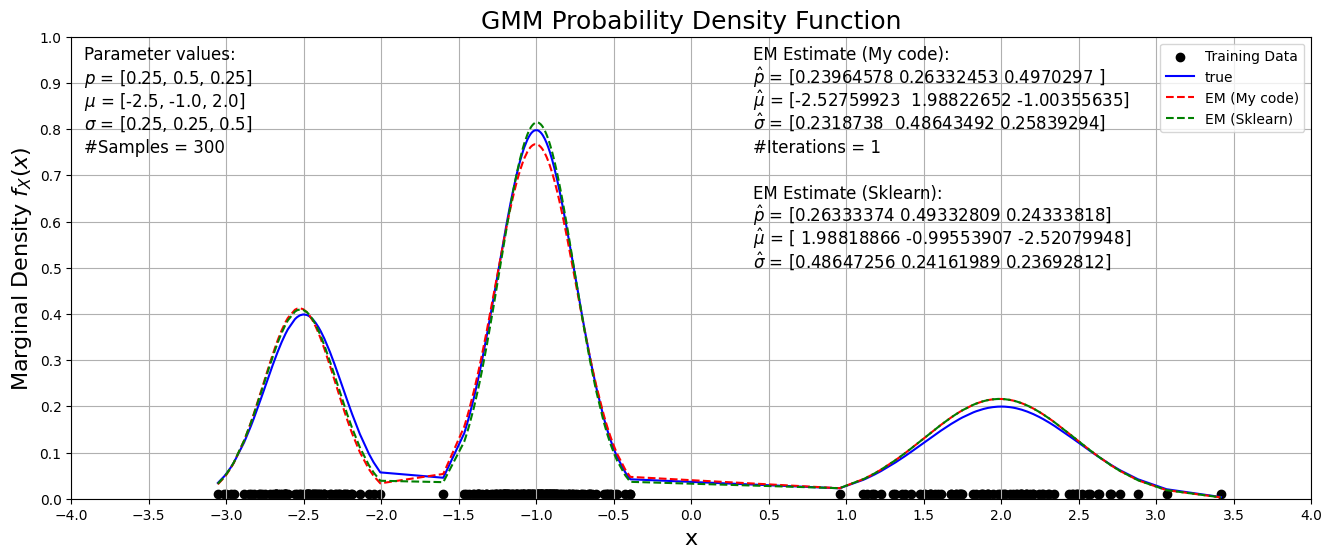

In [100]:
"""
Generate and plot the estimated density from the EM, and the true density
"""
#Plot the points, the true distribution and maximum likelihood estimate of the distribution.
#Clearly label the axes and the plots with legend.

# Set the figure size width and height
plt.figure(figsize = (16,6))

# Create a scatter plot for the training data points
plt.scatter(sx, np.zeros_like(sx)+0.01, label='Training Data', marker='o', color='black')

# Compute marginal density at the given points
sx_sorted = np.sort(sx)
f_x = generateDistribution(sx_sorted, p, mu, sigma, nc=len(p))
f_hat_x_EM = generateDistribution(sx_sorted, p_em, mu_em, np.sqrt(sigma_em), nc=len(p))
f_hat_x_EM_python = generateDistribution(sx_sorted, np.squeeze(gmm.weights_), np.squeeze(gmm.means_), np.sqrt(np.squeeze(gmm.covariances_)), nc=len(p))

# Plotting
plt.plot(sx_sorted, f_x, label='true', color='blue')
plt.plot(sx_sorted, f_hat_x_EM, linestyle='--', label='EM (My code)', color='red')
plt.plot(sx_sorted, f_hat_x_EM_python, linestyle='--', label='EM (Sklearn)', color='green')


plt.text(0.01, 0.95, 'Parameter values:', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.01, 0.9, f'$p$ = {p}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.01, 0.85, f'$\mu$ = {mu}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.01, 0.8, f'$\sigma$ = {sigma}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.01, 0.75, f'#Samples = {nx}', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.text(0.55, 0.95, 'EM Estimate (My code):', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.9, f'$\hat p$ = {p_em}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.85, f'$\hat\mu$ = {mu_em}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.8, f'$\hat\sigma$ = {np.sqrt(sigma_em)}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.75, f'#Iterations = {num_iterations}', transform=plt.gca().transAxes, fontsize=12, color='black')


plt.text(0.55, 0.65, 'EM Estimate (Sklearn):', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.6, f'$\hat p$ = {np.squeeze(gmm.weights_)}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.55, f'$\hat\mu$ = {np.squeeze(gmm.means_)}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.55, 0.5, f'$\hat\sigma$ = {np.sqrt(np.squeeze(gmm.covariances_))}', transform=plt.gca().transAxes, fontsize=12, color='black')



# Set the x-ticks from -5 to 5 with a step of 0.5
plt.xticks(np.arange(-5, 5.5, 0.5))

# Set the x-axis limits to -4 and 4
plt.xlim(-4, 4)

# Set the x-ticks from 0 to 1 with a step of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# Set the y-axis limits to 0 and 1
plt.ylim(0, 1)

# Add labels
plt.xlabel('x', fontsize=16)
plt.ylabel('Marginal Density $f_X(x)$', fontsize=16)
plt.title('GMM Probability Density Function', fontsize=18)
plt.grid()

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()